In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nxcom


In [ ]:
links_df = pd.read_csv('bitcoin.links.csv', quoting=3, on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: 'bitcoin.links.csv'

In [ ]:
vertices_df = pd.read_csv('bitcoin.vertices.csv', quoting=3, on_bad_lines='skip')

In [ ]:
print(links_df.head())
print(vertices_df.head())

    dst_id   src_id  count            maxdate            mindate
0      323  3078975      1  "20130124T081347"  "20130124T081347"
1   402879  5973967      1  "20120625T183626"  "20120625T183626"
2   486496  1249276      1  "20120209T080830"  "20120209T080830"
3  3329289  2304250      1  "20110810T200832"  "20110810T200832"
4  2147733   487172      1  "20120723T221852"  "20120723T221852"
       vid first_transaction_date
0  4395186      "20121020T154814"
1  1579034      "20111122T205459"
2  4243589      "20121109T102530"
3  4410153      "20121022T221136"
4   801488      "20110909T091517"


In [ ]:
G = nx.DiGraph()

In [ ]:
G.add_weighted_edges_from(
    links_df[['src_id', 'dst_id', 'count']].values
)

NameError: name 'G' is not defined

In [ ]:
print("Nombre de noeuds :", G.number_of_nodes())
print("Nombre d'arêtes :", G.number_of_edges())


Nombre de noeuds : 1229276
Nombre d'arêtes : 1063060


In [ ]:
attributes = pd.Series(vertices_df.first_transaction_date.values, index=vertices_df.vid).to_dict()
nx.set_node_attributes(G, attributes, 'first_transaction_date')


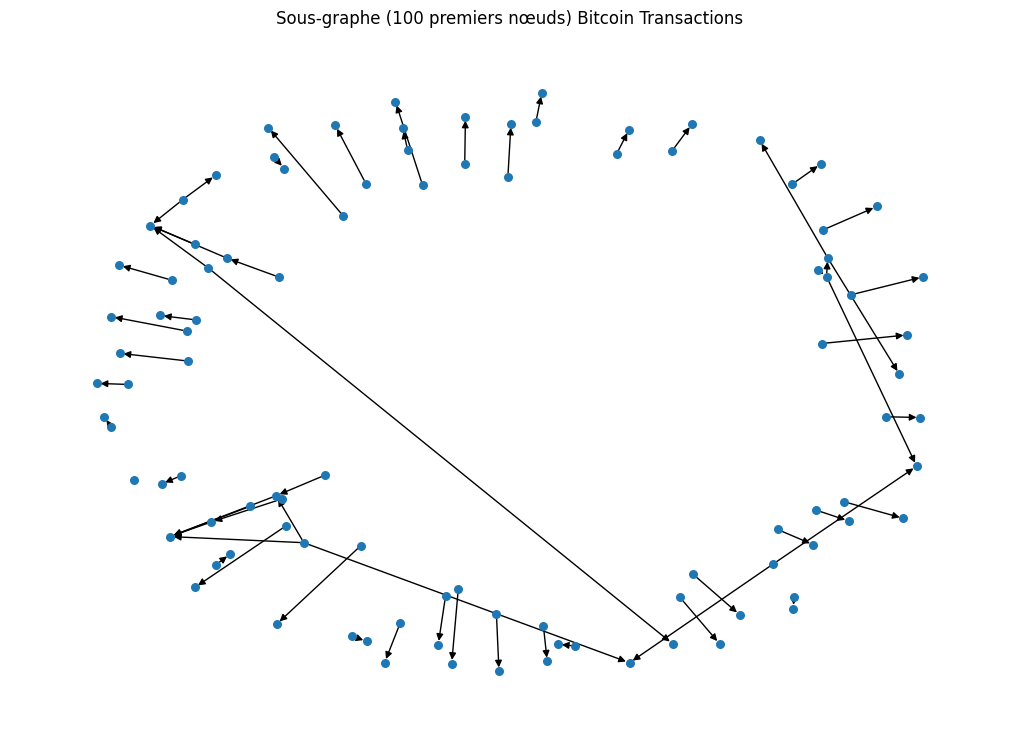

In [ ]:
sample_nodes = list(G.nodes())[:100]
subG = G.subgraph(sample_nodes)
pos = nx.spring_layout(subG, seed=42)
plt.figure(figsize=(10,7))
nx.draw(subG, pos, with_labels=False, node_size=30, arrowsize=10)
plt.title("Sous-graphe (100 premiers nœuds) Bitcoin Transactions")
plt.show()


In [ ]:
print("Densité :", nx.density(G))
print("Le graphe est-il fortement connecté ?", nx.is_strongly_connected(G))
print("Le graphe est-il faiblement connecté ?", nx.is_weakly_connected(G))

Densité : 7.034922624704506e-07
Le graphe est-il fortement connecté ? False
Le graphe est-il faiblement connecté ? False


In [ ]:
giant_component = max(nx.weakly_connected_components(G), key=len)
G_giant = G.subgraph(giant_component).copy()


In [ ]:
print("Taille de la composante géante :", len(G_giant.nodes))

Taille de la composante géante : 518969


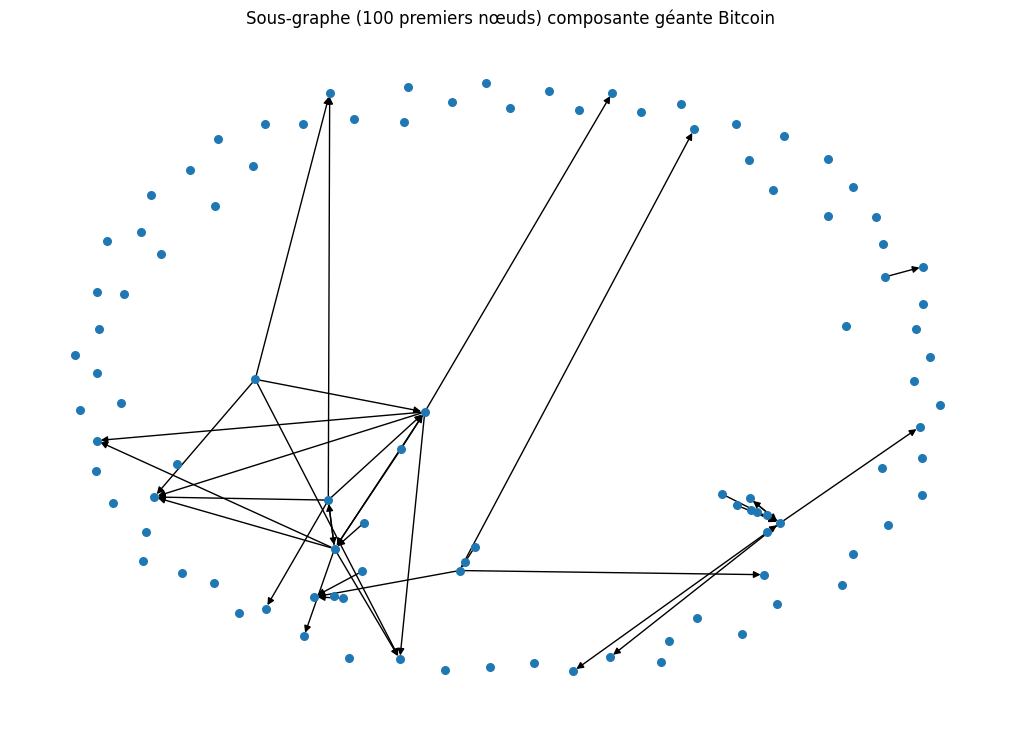

In [ ]:
sample_nodes = list(G_giant.nodes())[:100]
subG_giant = G_giant.subgraph(sample_nodes)
pos = nx.spring_layout(subG_giant, seed=42)
plt.figure(figsize=(10,7))
nx.draw(subG_giant, pos, with_labels=False, node_size=30, arrowsize=10)
plt.title("Sous-graphe (100 premiers nœuds) composante géante Bitcoin")
plt.show()

In [ ]:
in_degrees = dict(G_giant.in_degree())
out_degrees = dict(G_giant.out_degree())


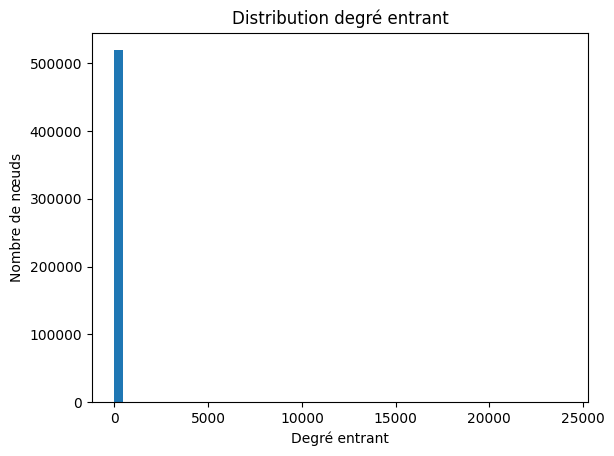

In [ ]:
plt.hist(list(in_degrees.values()), bins=50)
plt.title("Distribution degré entrant")
plt.xlabel("Degré entrant")
plt.ylabel("Nombre de nœuds")
plt.show()

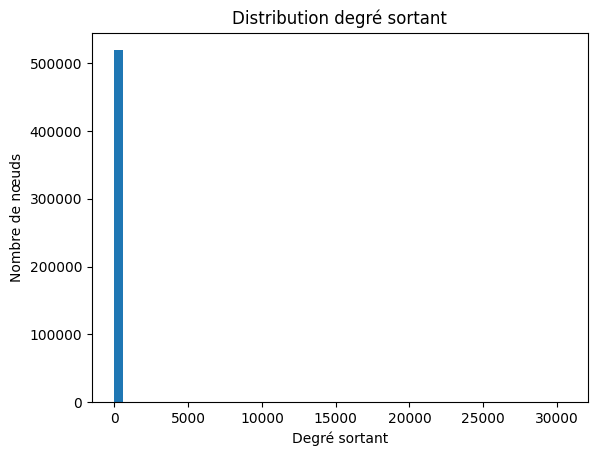

In [ ]:
plt.hist(list(out_degrees.values()), bins=50)
plt.title("Distribution degré sortant")
plt.xlabel("Degré sortant")
plt.ylabel("Nombre de nœuds")
plt.show()

In [ ]:
in_strength = dict(G_giant.in_degree(weight='weight'))
out_strength = dict(G_giant.out_degree(weight='weight'))

In [ ]:
import random

sample_nodes = random.sample(list(G_giant.nodes()), 2000)

G_sample = G_giant.subgraph(sample_nodes).copy()

degree_centrality_sample = nx.degree_centrality(G_sample)
closeness_centrality_sample = nx.closeness_centrality(G_sample)
betweenness_centrality_sample = nx.betweenness_centrality(G_sample)
eigenvector_centrality_sample = nx.eigenvector_centrality(G_sample, max_iter=1000)

print("Top 5 Centralité de degré:", sorted(degree_centrality_sample.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Centralité de Eigenvectors:", sorted(eigenvector_centrality_sample.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 Degree Centrality (sample): [(np.int64(4940119), 0.0005002501250625312), (np.int64(6120351), 0.0005002501250625312), (np.int64(2091170), 0.0005002501250625312), (np.int64(110027), 0.0005002501250625312), (np.int64(839132), 0.0005002501250625312)]
Top 5 Eigenvector Centrality (sample): [(np.int64(2091170), 0.3778222941894056), (np.int64(839132), 0.3778222941894056), (np.int64(529653), 0.3778222941894056), (np.int64(342388), 0.3778222941894056), (np.int64(728382), 0.3778222941894056)]


In [ ]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 (centralité de degré) :", top_degree)

Top 5 (centralité de degré) : [(np.int64(25), 0.09912364538854034), (np.int64(29), 0.046742766413343406), (np.int64(11), 0.046349678592899755), (np.int64(74), 0.03500215812921028), (np.int64(12564), 0.022261488184242575)]


In [ ]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 (centralité de degré) :", top_degree)


Top 5 (centralité de degré) : [(np.int64(25), 0.09912364538854034), (np.int64(29), 0.046742766413343406), (np.int64(11), 0.046349678592899755), (np.int64(74), 0.03500215812921028), (np.int64(12564), 0.022261488184242575)]


In [ ]:
top_betweenness = sorted(betweenness_centrality_sample.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 (centralité d’intermédiarité) :", top_betweenness)

Top 5 (centralité d’intermédiarité) : [(np.int64(2179080), 0.0), (np.int64(4833292), 0.0), (np.int64(4472853), 0.0), (np.int64(286759), 0.0), (np.int64(1548329), 0.0)]


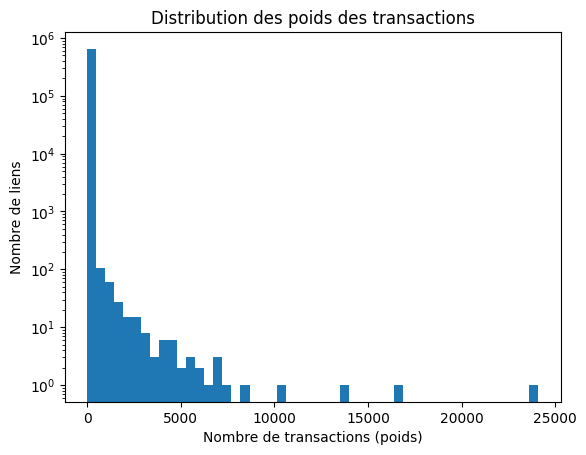

In [ ]:
weights = [d['weight'] for u,v,d in G_giant.edges(data=True)]
plt.hist(weights, bins=50, log=True)
plt.title("Distribution des poids des transactions")
plt.xlabel("Nombre de transactions (poids)")
plt.ylabel("Nombre de liens")
plt.show()

In [ ]:
assortativity = nx.degree_assortativity_coefficient(G_giant)
print("Assortativité (degré) :", assortativity)


Assortativité (degré) : -0.10425006782090754


Coefficient de clustering moyen (échantillon) : 0.0


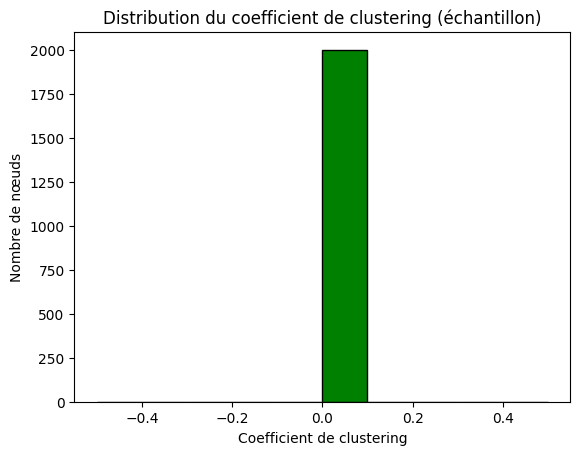

In [ ]:
sample_nodes = random.sample(list(G_giant.nodes()), 2000)
G_sample = G_giant.subgraph(sample_nodes).copy()

clustering_sample = nx.clustering(G_sample)

avg_clustering_sample = nx.average_clustering(G_sample)

print("Coefficient de clustering moyen (échantillon) :", avg_clustering_sample)

plt.hist(list(clustering_sample.values()), bins=10, color='green', edgecolor='black')
plt.title('Distribution du coefficient de clustering (échantillon)')
plt.xlabel('Coefficient de clustering')
plt.ylabel('Nombre de nœuds')
plt.show()


In [ ]:
largest_scc = max(nx.strongly_connected_components(G_giant), key=len)
G_scc = G_giant.subgraph(largest_scc).copy()

print("Longueur moyenne des chemins (APL) :", nx.average_shortest_path_length(G_scc))
print("Diamètre de la composante géante :", nx.diameter(G_scc.to_undirected()))

Longueur moyenne des chemins (APL) : 3.9096653729676856
Diamètre de la composante géante : 9


In [ ]:
from copy import deepcopy

def robustness_test(G, removal_fraction=0.1):
    G_copy = deepcopy(G)
    num_remove = int(removal_fraction * G_copy.number_of_nodes())
    nodes_sorted = sorted(G_copy.degree, key=lambda x: x[1], reverse=True)
    to_remove = [n for n, d in nodes_sorted[:num_remove]]
    G_copy.remove_nodes_from(to_remove)
    largest_cc = max(nx.weakly_connected_components(G_copy), key=len)
    return len(largest_cc) / G.number_of_nodes()

In [ ]:
print("Taille relative après suppression de 10% des hubs :", robustness_test(G_giant, 0.1))

Taille relative après suppression de 10% des hubs : 1.7342076308989554e-05


In [ ]:
sample_nodes = random.sample(list(G_giant.nodes()), 2000)
G_sample = G_giant.subgraph(sample_nodes).copy()

G_sample_undirected = G_sample.to_undirected()

communities_sample = nxcom.greedy_modularity_communities(G_sample_undirected)

print("Nombre de communautés détectées (échantillon) :", len(communities_sample))



Nombre de communautés détectées (échantillon) : 1995


In [ ]:
color_map = {}
for c_idx, community in enumerate(communities_sample):
    for name in community:
        color_map[name] = c_idx

colors = [color_map.get(n, 0) for n in G_giant.nodes()]
sample_nodes = list(G_giant.nodes())[:2000]
subG_giant = G_giant.subgraph(sample_nodes)
pos = nx.spring_layout(subG_giant, seed=42)

plt.figure(figsize=(12,8))
nx.draw(subG_giant, pos, node_color=[color_map.get(n, 0) for n in sample_nodes],
        with_labels=False, node_size=20, cmap=plt.cm.tab20)
plt.title('Communautés Bitcoin (échantillon)')
plt.show()

NameError: name 'communities_sample' is not defined

In [ ]:
sample_nodes = random.sample(list(G_giant.nodes()), 2000)
G_sample = G_giant.subgraph(sample_nodes).copy()
G_sample_undirected = G_sample.to_undirected()

core_numbers_sample = nx.core_number(G_sample_undirected)
print("Noyau le plus dense (k-core max, échantillon) :", max(core_numbers_sample.values()))

Noyau le plus dense (k-core max, échantillon) : 1


In [ ]:
A_sample = nx.adjacency_matrix(G_sample)
print("Matrice d'adjacence du sous-graphe (échantillon) :")
print(A_sample.todense())

Matrice d'adjacence du sous-graphe (échantillon) :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
!pip install networkx
import networkx as nx
import numpy as np

knn_sample = nx.average_neighbor_degree(G_sample_undirected)

print("Degré moyen des voisins (échantillon) :", knn_sample)

Degré moyen des voisins (échantillon) : {np.int64(1613824): 0.0, np.int64(2187268): 0.0, np.int64(450565): 0.0, np.int64(2269211): 0.0, np.int64(802844): 0.0, np.int64(4464667): 0.0, np.int64(360484): 0.0, np.int64(5365804): 0.0, np.int64(6283311): 0.0, np.int64(2424881): 0.0, np.int64(3858491): 0.0, np.int64(196668): 0.0, np.int64(4956221): 0.0, np.int64(4268099): 0.0, np.int64(114759): 0.0, np.int64(360521): 0.0, np.int64(4399178): 0.0, np.int64(4571223): 0.0, np.int64(5865559): 0.0, np.int64(4169817): 0.0, np.int64(4587612): 0.0, np.int64(5423200): 0.0, np.int64(516194): 0.0, np.int64(4513890): 0.0, np.int64(4948068): 0.0, np.int64(4989029): 0.0, np.int64(3776622): 0.0, np.int64(4292721): 0.0, np.int64(1597554): 0.0, np.int64(974963): 0.0, np.int64(1392760): 0.0, np.int64(4112516): 0.0, np.int64(1556619): 0.0, np.int64(6209681): 0.0, np.int64(3932307): 0.0, np.int64(5963927): 0.0, np.int64(4751513): 0.0, np.int64(5644448): 0.0, np.int64(426150): 0.0, np.int64(516265): 0.0, np.int64(

In [ ]:
triangles_sample = sum(nx.triangles(G_sample_undirected).values()) // 3
print("Nombre de triangles (échantillon) :", triangles_sample)

Nombre de triangles (échantillon) : 0


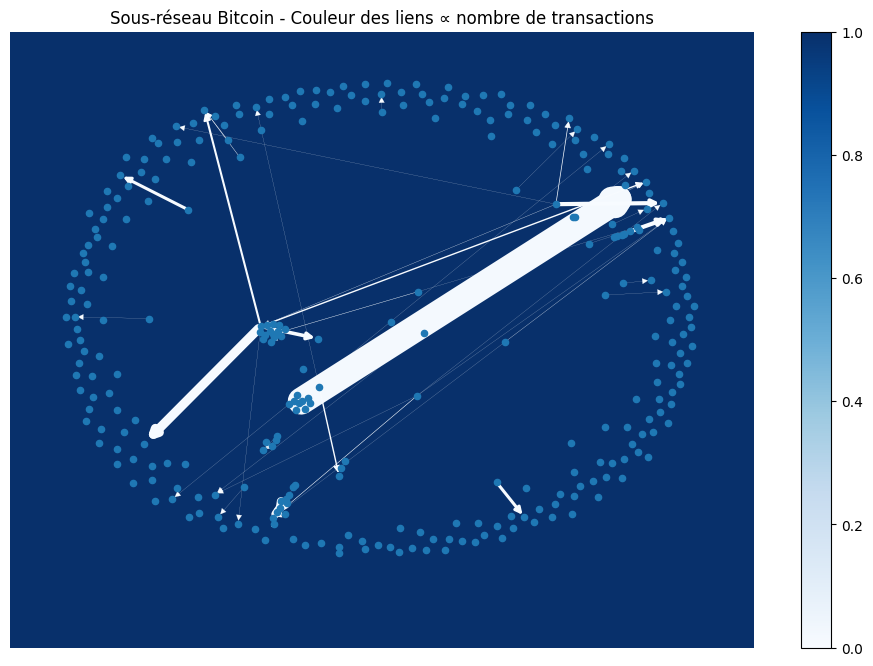

In [ ]:
sample_nodes = list(G_giant.nodes())[:300]
subG = G_giant.subgraph(sample_nodes)

pos = nx.spring_layout(subG, seed=42)

weights = [d['weight'] for (u, v, d) in subG.edges(data=True)]

fig, ax = plt.subplots(figsize=(12,8))
nx.draw(subG, pos, with_labels=False,
        node_size=20,
        edge_color=weights, edge_cmap=plt.cm.Blues,
        width=[w/10 for w in weights], ax=ax)

plt.title('Sous-réseau Bitcoin - Couleur des liens ∝ nombre de transactions')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), ax=ax) # Pass the axes object to plt.colorbar
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 1. Calculer les positions des noeuds
pos = nx.spring_layout(G_giant, k=0.1, iterations=50, seed=42)
# k=0.1 = étaler un peu plus
# Attention, cette ligne seule peut déjà prendre 30min-1h !!

# 2. Dessiner le graphe entier
plt.figure(figsize=(50, 50))  # GROSSE figure
nx.draw(G_giant, pos,
        node_size=1,
        edge_color='grey',
        alpha=0.3,
        with_labels=False)

plt.title("Bitcoin Transactions - Réseau complet", fontsize=40)
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np
import pandas as pd
import networkx as nx

# ... (Code to read data and create graph 'G') ...

# Get giant component
giant_component = max(nx.weakly_connected_components(G), key=len)
G_giant = G.subgraph(giant_component).copy()

# Extraire les 300 premiers nœuds
sample_nodes = list(G_giant.nodes())[:300]
subG = G_giant.subgraph(sample_nodes)

# Position des nœuds
pos = nx.spring_layout(subG, seed=42)

# Poids des arêtes
weights = np.array([d['weight'] for (u, v, d) in subG.edges(data=True)])

# Normaliser les poids entre 0 et 1 pour la colorisation
norm = mcolors.Normalize(vmin=weights.min(), vmax=weights.max())
edge_colors = plt.cm.Blues(norm(weights))

# Représentation graphique
fig, ax = plt.subplots(figsize=(12,8))
nx.draw(subG, pos, with_labels=False,
        node_size=20,
        edge_color=edge_colors,
        width=2,
        ax=ax)

# Légende couleur liée aux vrais poids
sm = ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])  # Nécessaire pour afficher la colorbar sans avertissement
plt.colorbar(sm, ax=ax, label='Nombre de transactions')

plt.title('Sous-réseau Bitcoin - Couleur des liens ∝ nombre de transactions')
plt.show()


NameError: name 'G' is not defined